# Consts

In [1]:
SR = 16000
LENGTH = 80000 # 5 seconds of audio
COLORS = ["#50514f", "#283618", "#ee6c4d", "#03045e", "#9d4edd"]

# Vizualize the data

## Start

In [2]:
# import pandas as pd
from glob import glob

In [3]:
sounds = glob("../data/LibriCount/*.wav")
labels = glob("../data/LibriCount/*.json")

In [4]:
import soundfile as sf
from utils.vscode_audio import Audio

i = 1200
clip, sr = sf.read(sounds[i])
print("Clip name :", sounds[i].split("/")[-1])
print("Audio clip length:", len(clip), "\t sample rate :", sr)
Audio(clip, sr)

Clip name : 1_4db59a.wav
Audio clip length: 80000 	 sample rate : 16000


## Verify the data is clean

It have been said in the data description that all the files are 5 seconds lenght and a sample rate of 16000 (80000 sample). Lets test that !

In [11]:
# #ALL is fine ! 
# for clip_name in sounds:
#     clip, sr = sf.read(clip_name)
#     assert clip.shape[0] == LENGTH, "Clip length is not correct for " + str(clip_name) + ", found : " + str(clip.shape[0])
#     assert sr == SR, "Sample rate mismatch for " + str(clip_name) + ", found : " + str(sr)
# print("All clips are fine !")

All clips are fine !


In [12]:
# import json

# F = 0
# M = 0
# for label_name in labels:
#     with open(label_name) as f:
#         data = json.load(f)
#     for person in data:
#         gender = person['sex']
#         assert gender in ["F", "M"], "Gender mismatch for "+str(label_name)+", found : "+str(gender)
#         if gender == "F":
#             F+=1
#         else :
#             M+=1
# print("M =", M)
# print("F =", F)

M = 14333
F = 14267


## Go deep in vizualization

In [8]:
import json

with open(labels[1200]) as f:
    data = json.load(f)
print("Full format is :", data)
print("This", data[0]["activity"]," is the parts where the speech should occure, lets shallowly check that ")


Full format is : [{'sex': 'F', 'activity': [[0, 52144], [53425, 78570], [78731, 80000]], 'speaker_id': 1995}]
This [[0, 52144], [53425, 78570], [78731, 80000]]  is the parts where the speech should occure, lets shallowly check that 


Reading clip : 7_76d68a.wav 	 i= 4404


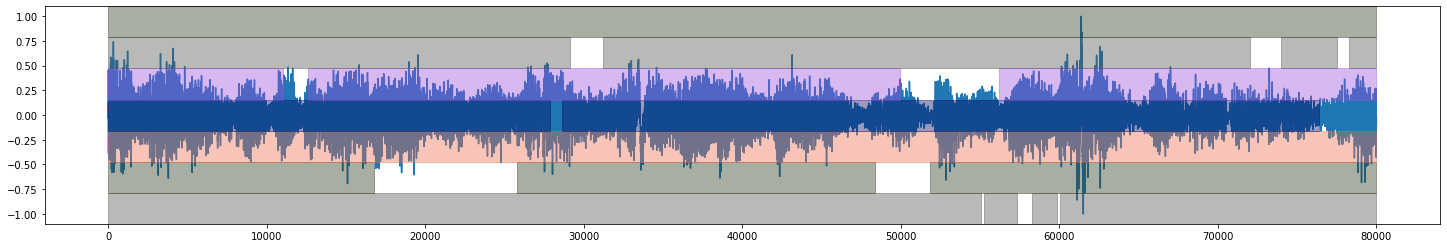

Reading clip : 5_1595a3.wav 	 i= 3161


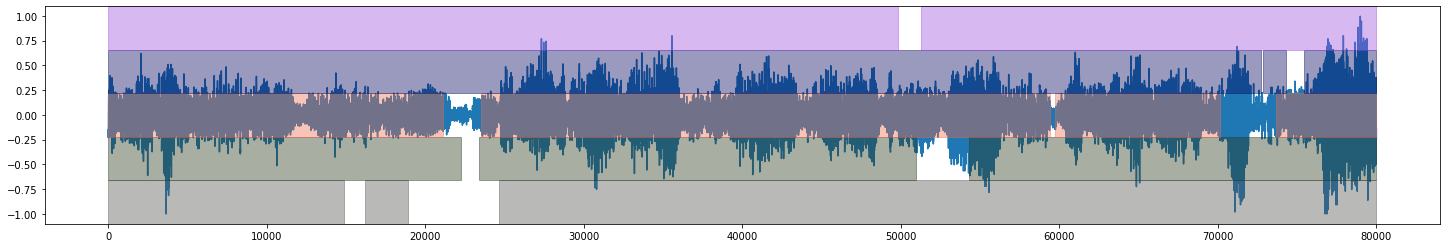

Reading clip : 4_65aad9.wav 	 i= 2782


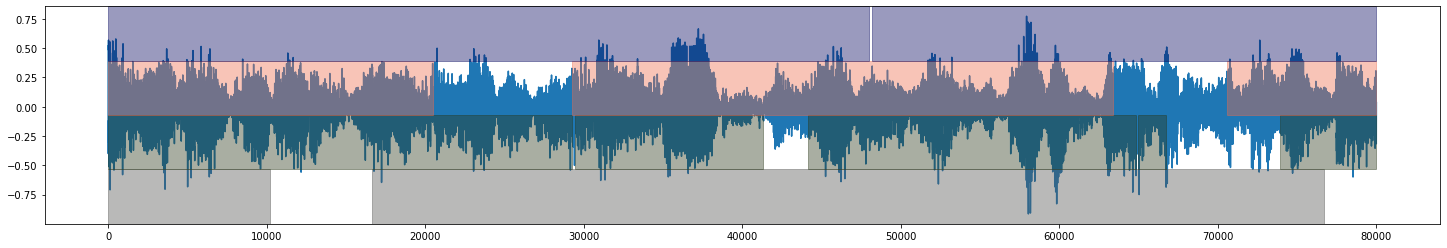

Reading clip : 8_d1f8b8.wav 	 i= 5103


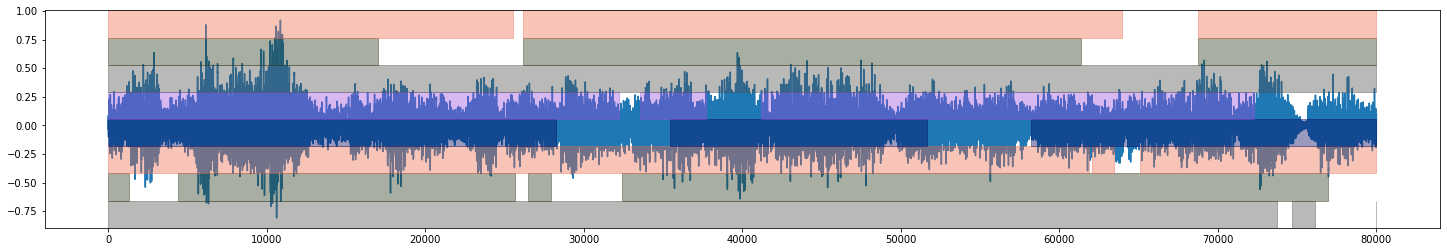

Reading clip : 6_24a52c.wav 	 i= 3724


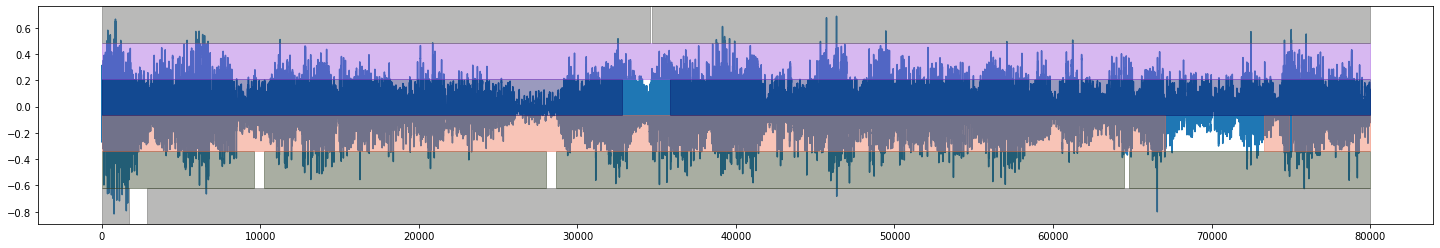

In [96]:
import matplotlib.pyplot as plt
import random

for _ in range(5):
    i = random.randint(0, len(sounds)-1)
    clip, _ = sf.read(sounds[i])
    print("Reading clip :", sounds[i].split("/")[-1], "\t i=",i)

    plt.figure(figsize=(25, 4))
    with open(labels[i]) as f:
        data = json.load(f)
    persons = len(data)
    for i, person in enumerate(data):
        for span in person["activity"]:
            plt.axvspan(*span, alpha=0.4,ymin=i/persons, ymax= (i+1)/persons , color=COLORS[i%len(COLORS)], zorder=1)
    plt.plot(clip, zorder=0)
    display(Audio(clip, SR))
    plt.show()